# Proyecto cadena de gimnasios Model Fitness
Model Fitness, está desarrollando una estrategia de interacción con clientes basada en datos analíticos. Ha digitalizado varios de sus perfiles de clientes.

**Objetivo** Con el fin de combatir la cancelación, analizar los datos y elaborar una estrategia de retención de clientes.

## Lectura general de los datos

In [1]:
# Importacion de librerias 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Mónica, excelente inicio importando todas las librerías relevantes para el análisis, cubriendo aspectos de procesamiento de datos, visualización y modelado predictivo. Esto proporciona un buen fundamento para el flujo de trabajo de análisis.</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Para optimizar la eficiencia, podrías considerar importar solo aquellas librerías que realmente vayas a utilizar. Por ejemplo, si en el futuro no se implementan métodos de `scipy.cluster`, podrías evitar su importación.</div>


In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Muy bien, Mónica, has comenzado con una exploración adecuada de los datos, verificando la estructura y el tipo de variables. Esto es fundamental para identificar posibles problemas iniciales como valores nulos o inconsistencias.</div>



In [3]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Separamos son los columnas categoricas 
df_col_cate = df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
df_col_cate.describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [5]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente trabajo al explorar la distribución de la variable `churn`, Mónica. Esto te brinda una visión preliminar del balance de clases, algo esencial para seleccionar métodos de clasificación y ajustar el modelo si es necesario.</div>


## Analisis exploratorio 

In [6]:
#Comprobamos valores ausentes
df.isna().sum()

# Estudiamos los valores promedio y la desviacion estandar
# Separamos son los columnas categoricas 
df_col_cate = df[['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']]
df_col_cate.describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [7]:
# los valores medios de las características segun churn
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

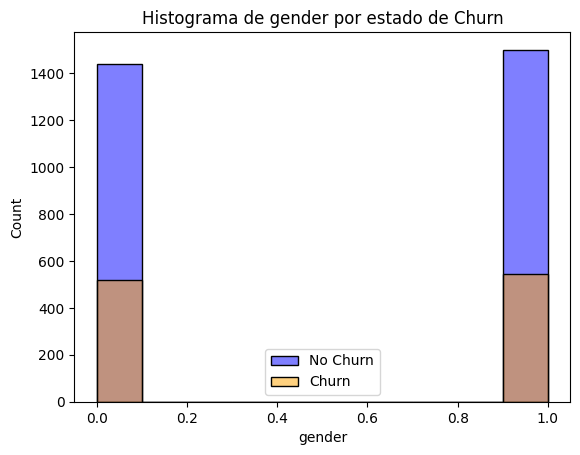

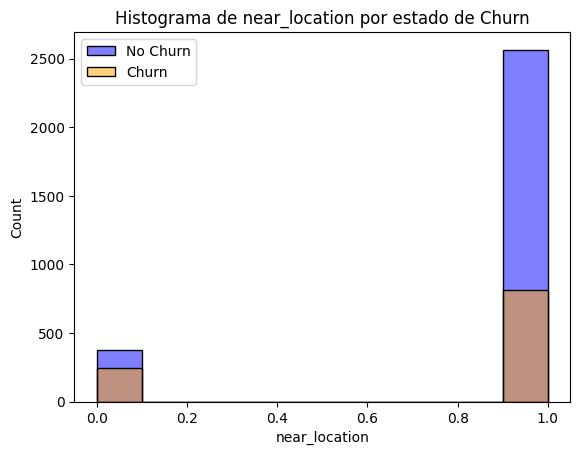

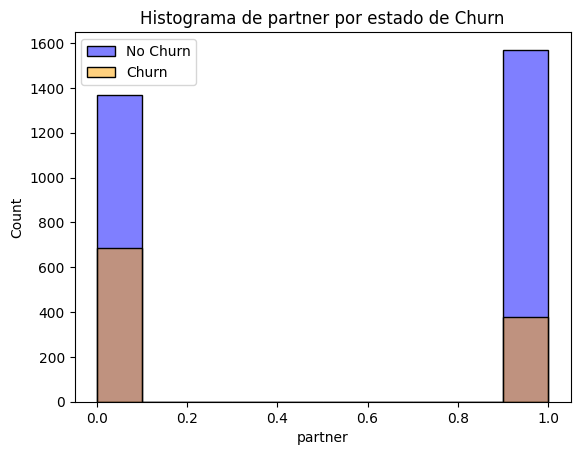

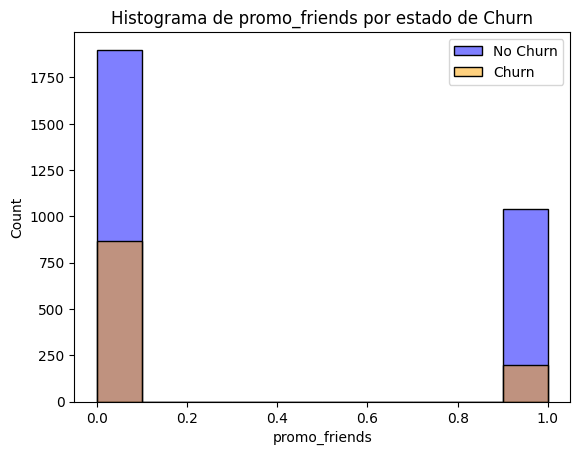

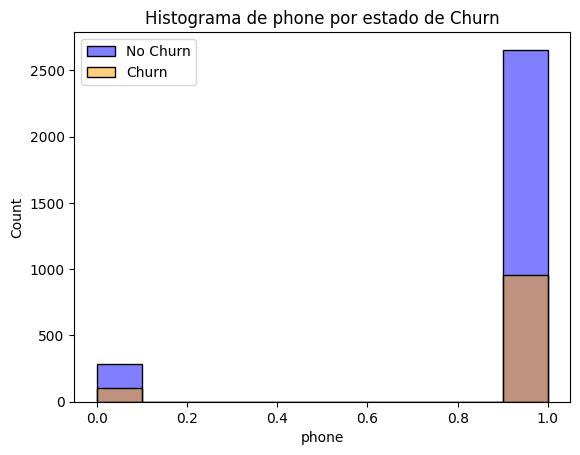

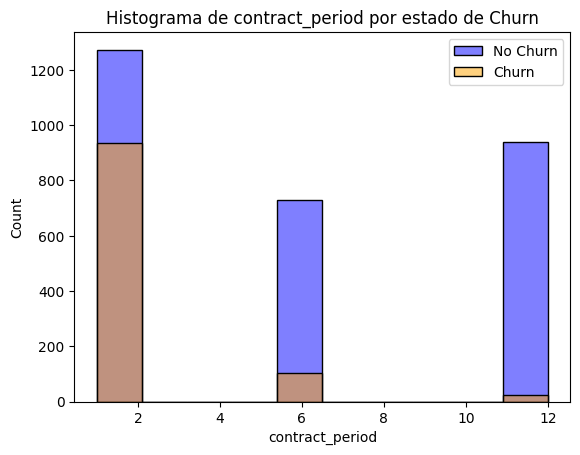

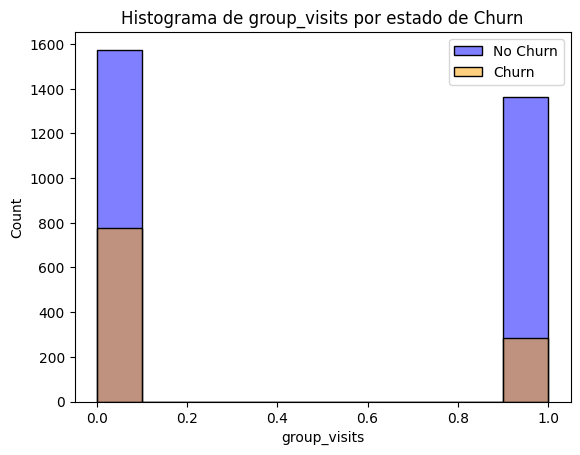

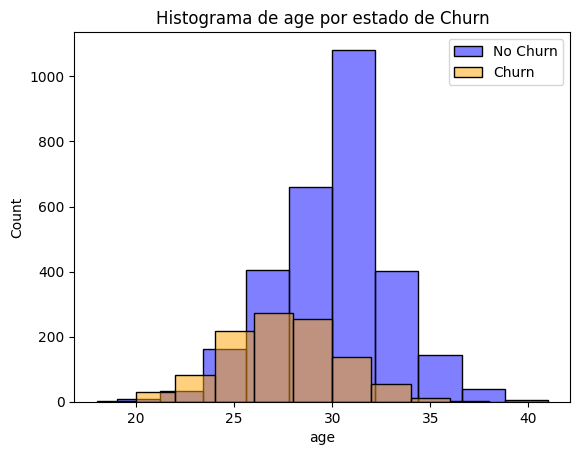

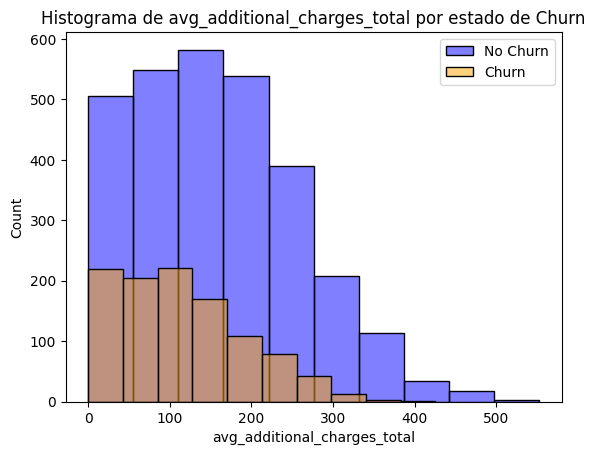

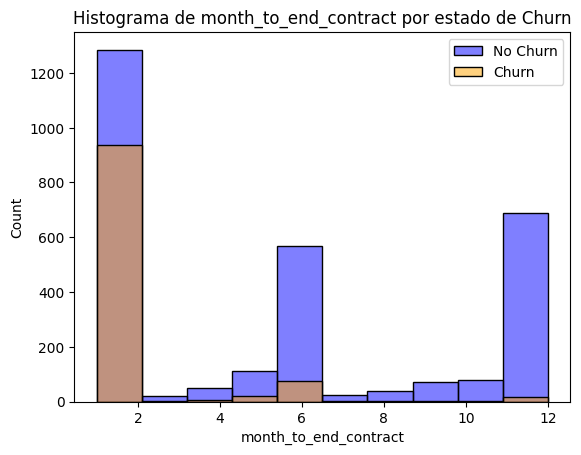

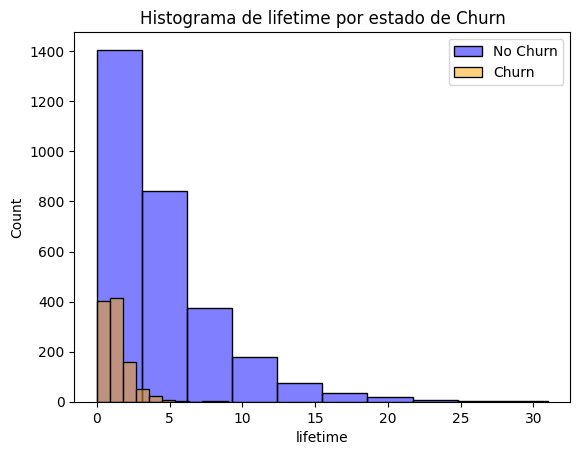

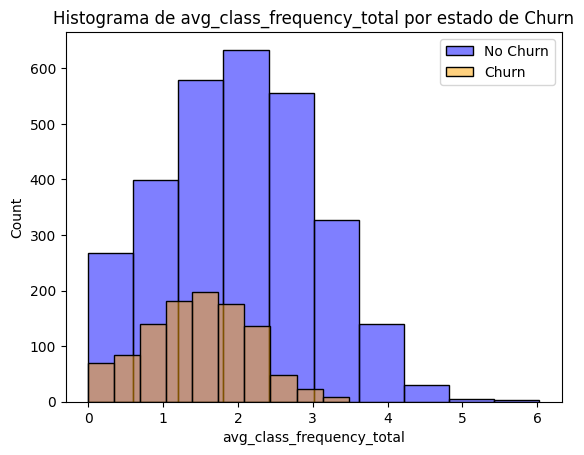

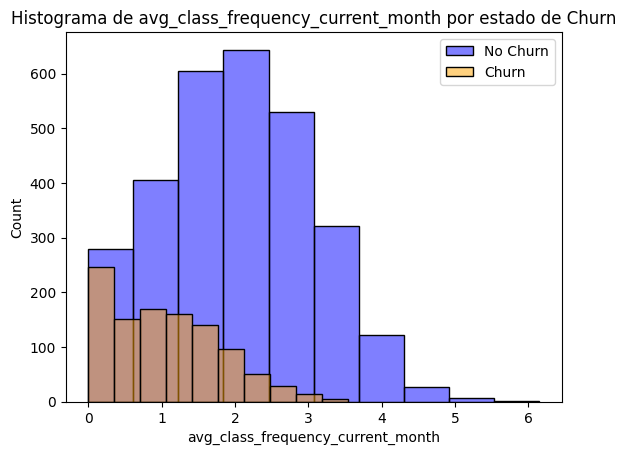

In [8]:

# Iterar sobre cada columna excepto 'churn'
for columna in df.drop('churn', axis=1).columns:
    
    sns.histplot(df[df['churn'] == 0][columna], kde=False, label='No Churn', color='blue', alpha=0.5, bins=10)
    sns.histplot(df[df['churn'] == 1][columna], kde=False, label='Churn', color='orange', alpha=0.5, bins=10)
   
    plt.legend()
    plt.title(f'Histograma de {columna} por estado de Churn')
    
    plt.show()


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Buen trabajo al generar histogramas de las características, diferenciando entre las clases `churn` y `no churn`. Esto permite visualizar claramente las diferencias y patrones iniciales entre los dos grupos.</div>


### Crea una matriz de correlación y muéstrala

<AxesSubplot:>

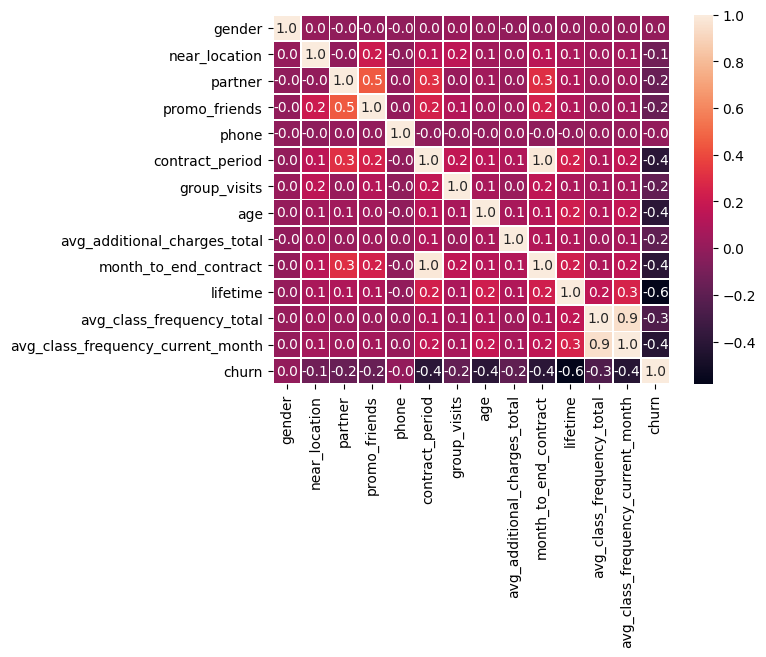

In [10]:
#Definimos la correlacion y la ajustamos
corr = df.corr(method='spearman')
sns.heatmap(data=corr, annot=True, fmt=".1f", linewidth=.5)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Muy bien al crear una matriz de correlación. Esto facilita la identificación de relaciones entre variables, lo que es útil para reducir multicolinealidad y mejorar el desempeño de los modelos.</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Recomendaría hacer un análisis adicional sobre la correlación entre `partner` y `promo_friends`. Podría ser útil revisar si eliminar una de estas variables ayuda a evitar la multicolinealidad, algo especialmente importante en modelos lineales.</div>


**Conclusion:**
se observa una positiva correlacion entre las columnas pather y promo_friends

## modelo para predecir la cancelación de usuarios

### modelo logistregression

In [11]:
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = df.drop(columns = ['churn'])
y = df['churn']

# divide los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df['churn'])

In [12]:
# Comprobamos que los datos de entrenamiento y validacion se hallan distribuido proporcionalmente
print('Proporcion entre los datos de entrenamiento y validación')
y_train.value_counts(1), y_test.value_counts(1)

Proporcion entre los datos de entrenamiento y validación


(0    0.734688
 1    0.265313
 Name: churn, dtype: float64,
 0    0.735
 1    0.265
 Name: churn, dtype: float64)

In [13]:
# crea un objeto StandardScaler y aplícalo al set de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # aplica la estandarización a la matriz de característica para el set de prueba

# Estandarización de la matriz de característica para el set de prueba
X_test_st = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)

# utiliza el modelo entrenado para hacer previsiones
probabilities = model.predict_proba(X_test)[:,1]

# predicción binaria
predictions = model.predict(X_test)
print('Metricas de clasificación para el modelo "regresión logística"')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Metricas de clasificación para el modelo "regresión logística"
Exactitud: 0.92
Precisión: 0.89
Recall: 0.81


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Buen uso de la Regresión Logística como modelo inicial, y excelente decisión de estandarizar los datos antes del entrenamiento. Esto es crucial para garantizar un buen rendimiento en los modelos lineales.</div>
<div class="alert alert-block alert-warning">
<b>A resolver</b> <a class="tocSkip"></a>
Veo un aviso de que el modelo no ha convergido. Prueba aumentando el número de iteraciones (`max_iter`) o revisa si alguna variable presenta una gran dispersión que pueda estar afectando la convergencia.</div>


### Modelo RandomForestClassifier

In [14]:
rf_model =  RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculamos las metricas de clasificacion
print('Metricas de clasificación para el modelo "Bosque aleatorio"')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precisión: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))


Metricas de clasificación para el modelo "Bosque aleatorio"
Exactitud: 0.92
Precisión: 0.89
Recall: 0.81


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Excelente decisión al utilizar `RandomForestClassifier`, ya que este modelo maneja bien las relaciones no lineales y es menos sensible a la escala de las variables.</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Para mejorar la robustez de tu modelo, podrías considerar ajustar el hiperparámetro `n_estimators` o realizar un `GridSearchCV` para optimizar el rendimiento y precisión del modelo.</div>


**Conclusión:**
    - El modelo con mejores resultados es regresion logistica, ya que la metrica 'Precision' dio un mejor resultado, ya que es mas probable de que cuando diga que un cliente va a cancelar, este en lo correcto.


## Crear clústeres de usuarios/as

### dendrograma

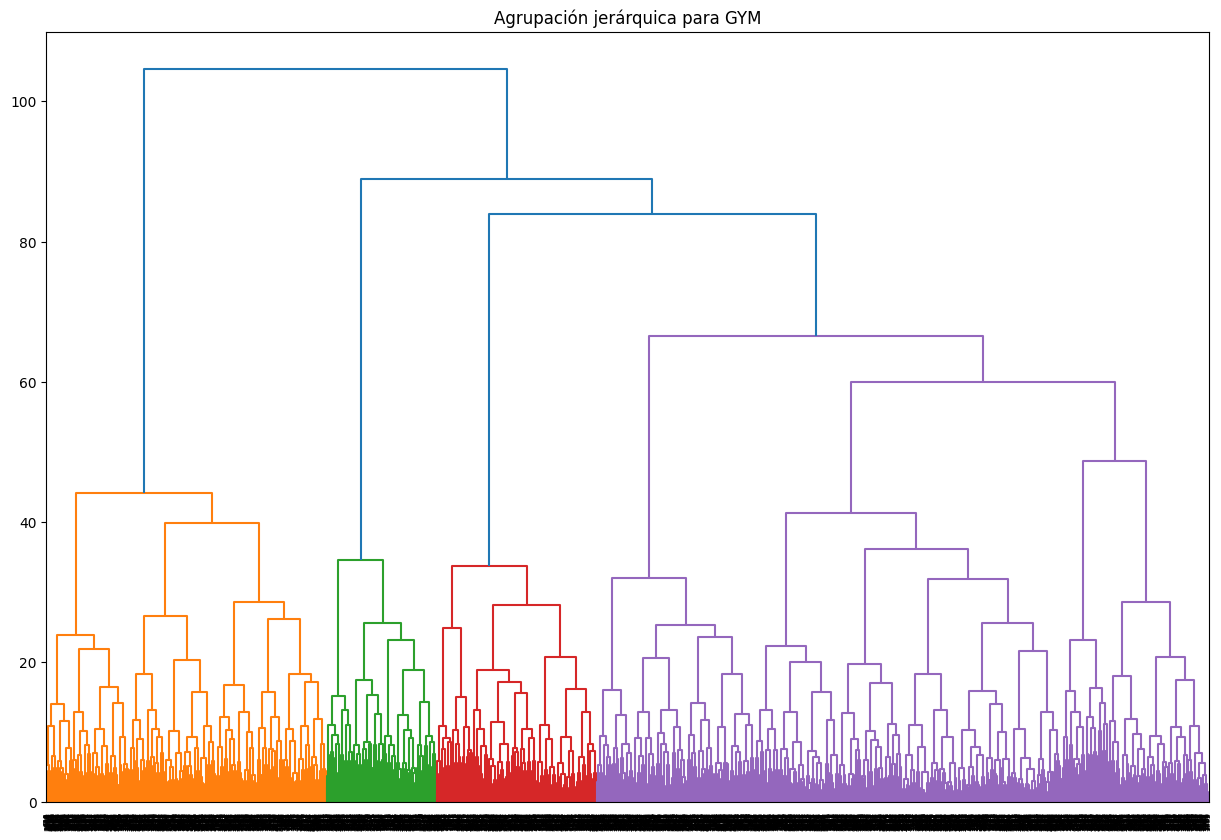

In [15]:
# Estaderizamos los datos de entrenamiento
scaler = StandardScaler()
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

#Creacion del demograma 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Mónica, muy bien al usar el dendrograma para observar la estructura de posibles clústeres en los datos. Esto da una buena intuición de cómo los datos se agrupan jerárquicamente.</div>


### Modelo de clustering con el algortimo K-means

In [16]:
# establecer el número de clústeres en 5
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc)
labels
df['cluster_km'] = labels



<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Bien implementado el modelo `KMeans` y la asignación de clústeres. Establecer el número de clústeres en 5 muestra una clara intención de dividir los datos en grupos manejables para estrategias específicas.</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Considera usar el método del codo (`elbow method`) para justificar la selección del número de clústeres, ya que un análisis visual puede ayudar a confirmar que 5 es la elección más adecuada.</div>


### valores medios de característica para los clústeres

In [17]:
# obtiene las estadísticas de los valores medios de las característica para los clústeres
df.groupby(['cluster_km']).mean()



,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.498531,0.960823,0.783546,0.575906,1.0,10.854065,0.539667,29.972576,161.128963,9.920666,4.723800,2.003225,1.996705,0.027424
1,0.483845,1.000000,0.355412,0.242326,1.0,1.962843,0.340065,28.144588,130.918569,1.872375,2.390953,1.233389,0.995856,0.519386
2,0.564858,0.977594,0.343160,0.221698,1.0,2.550708,0.472877,30.122642,161.268043,2.349057,4.916274,2.812928,2.807517,0.074292
3,0.497041,0.000000,0.461538,0.078895,1.0,2.378698,0.218935,28.479290,135.631940,2.224852,2.812623,1.662253,1.480228,0.441815
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


**Conclusión:**
    - el cluster 0 en comparacion con los demas, el promedio de usuarios que viven en la vecindad es menor, al igual que las visitas por semana.
   

In [18]:
df.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0


### Distribucion 

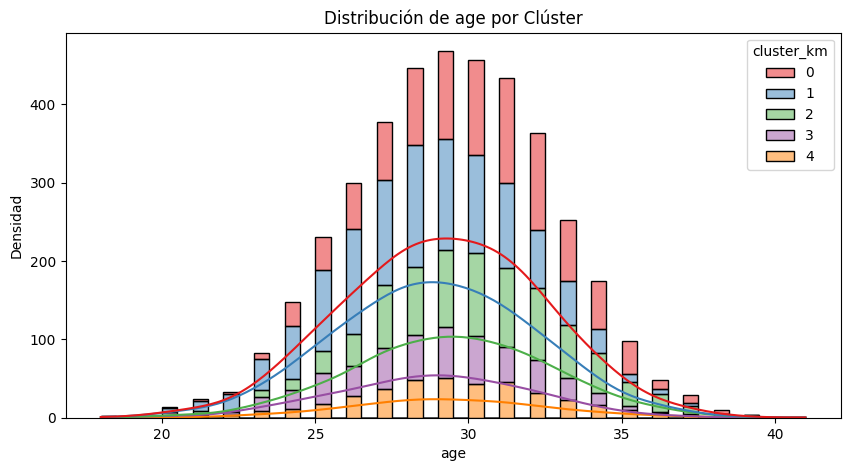

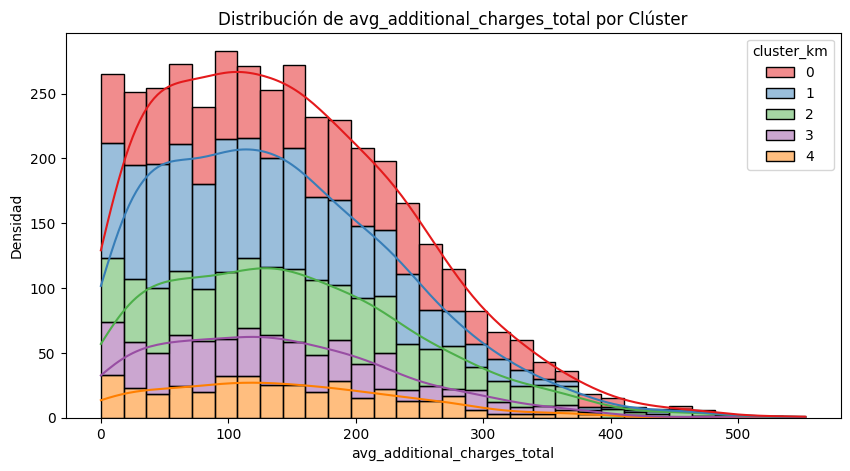

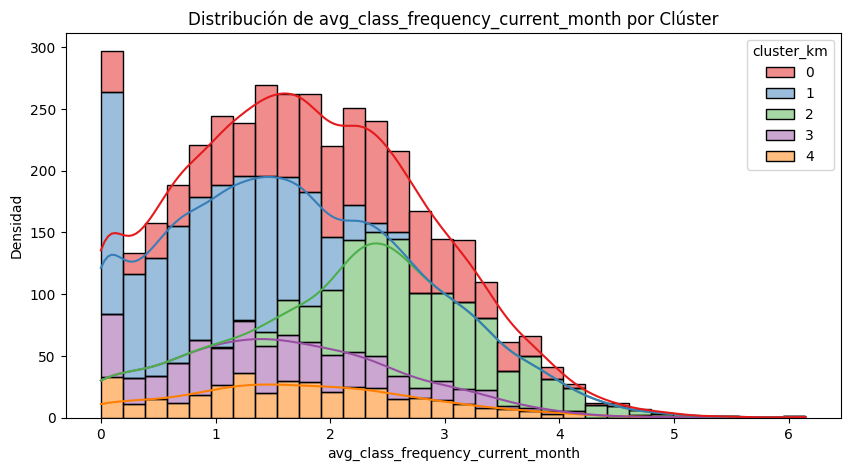

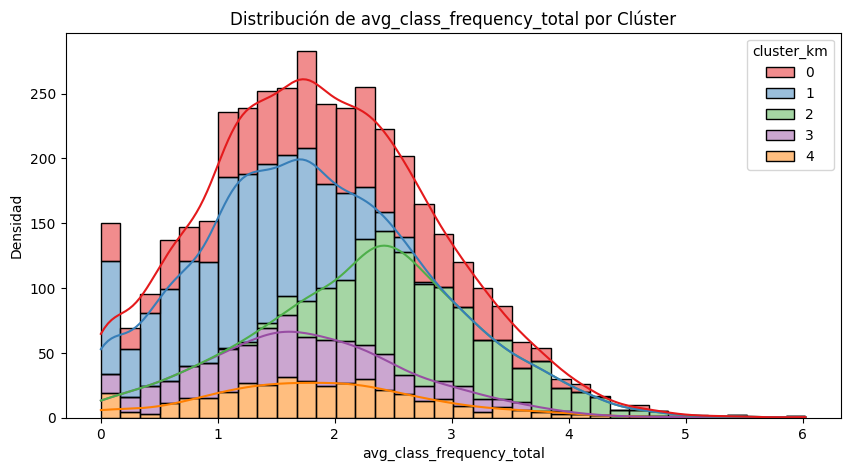

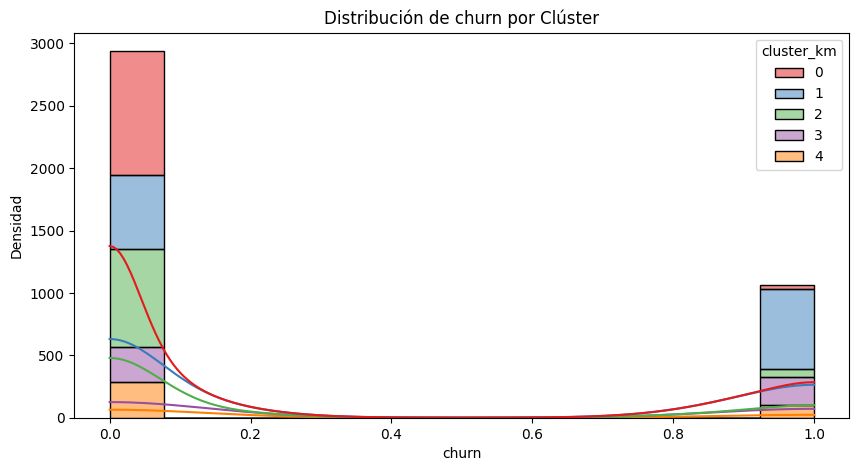

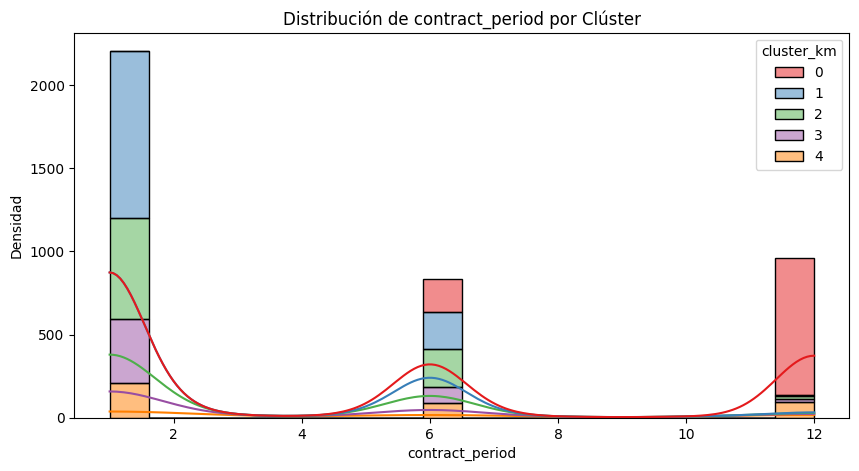

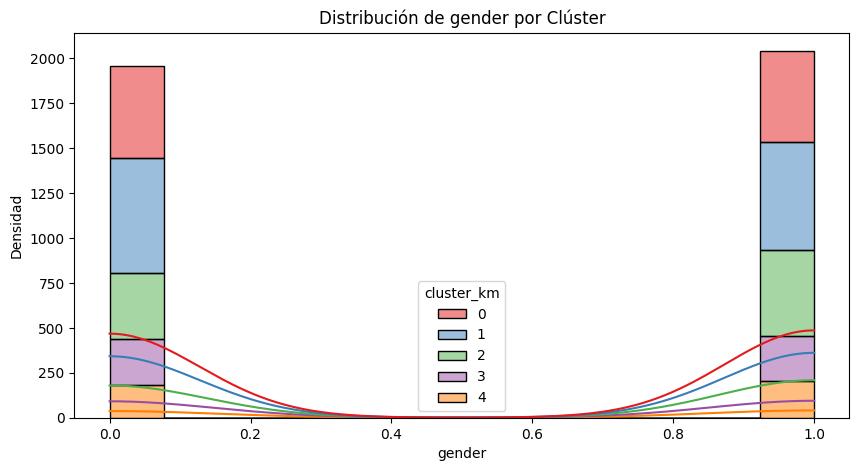

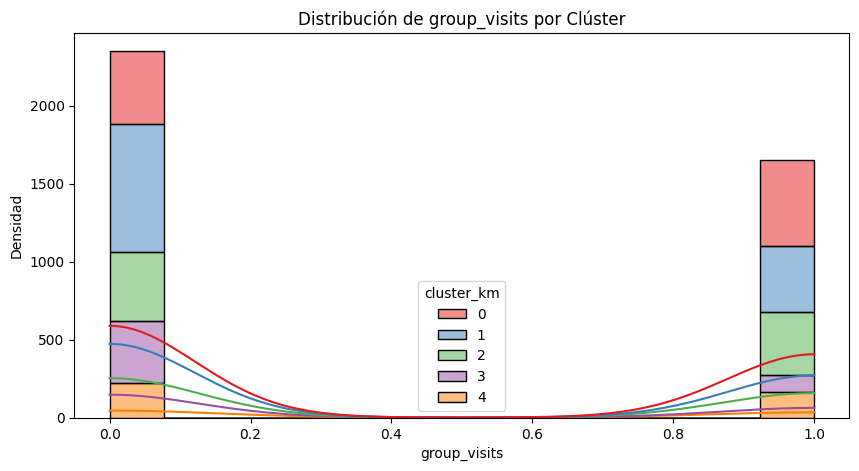

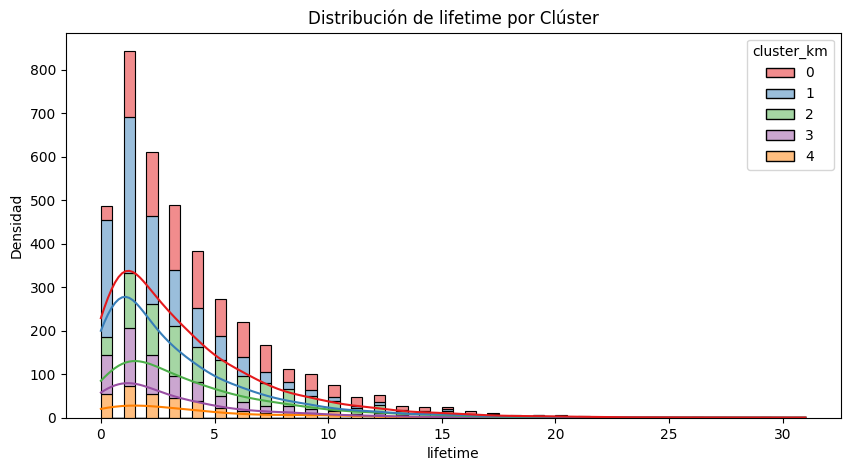

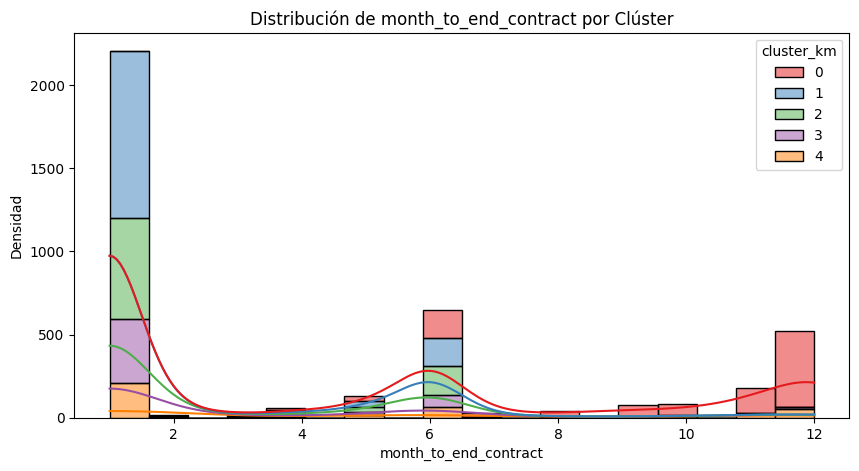

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


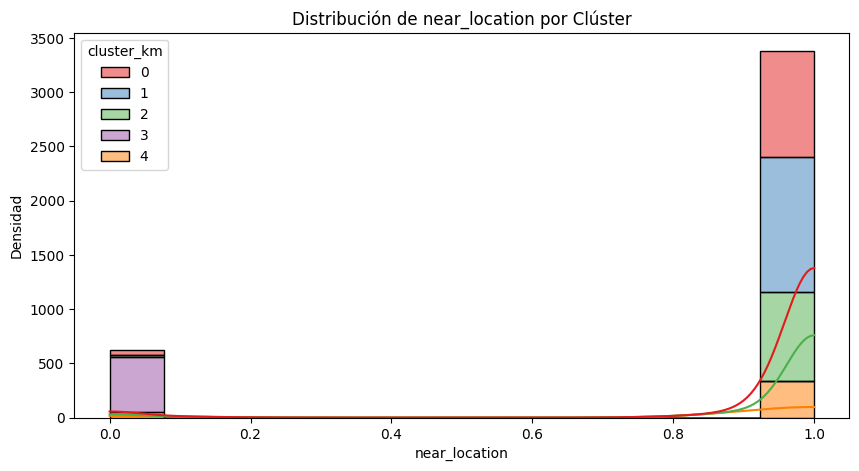

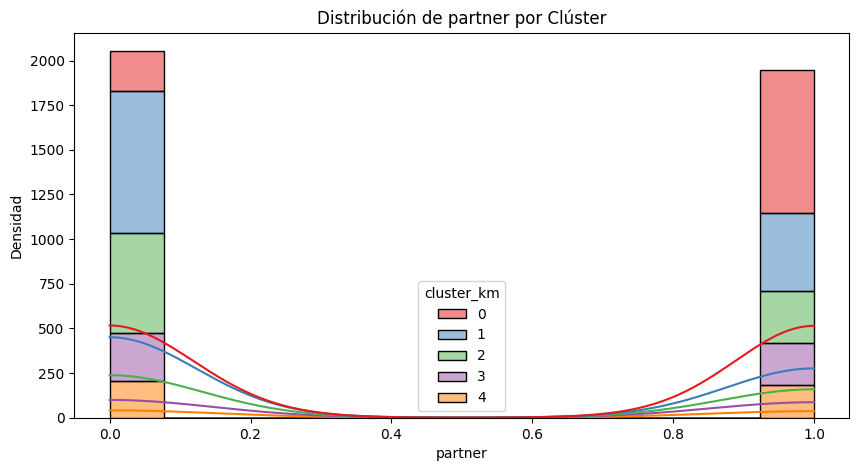

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


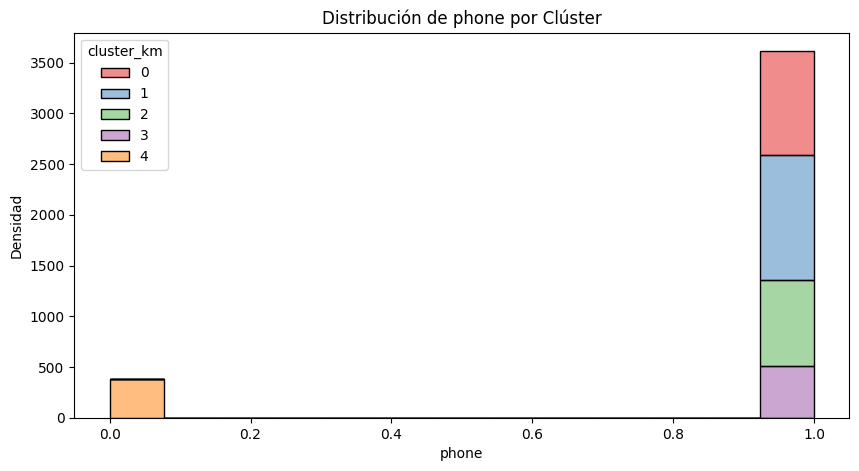

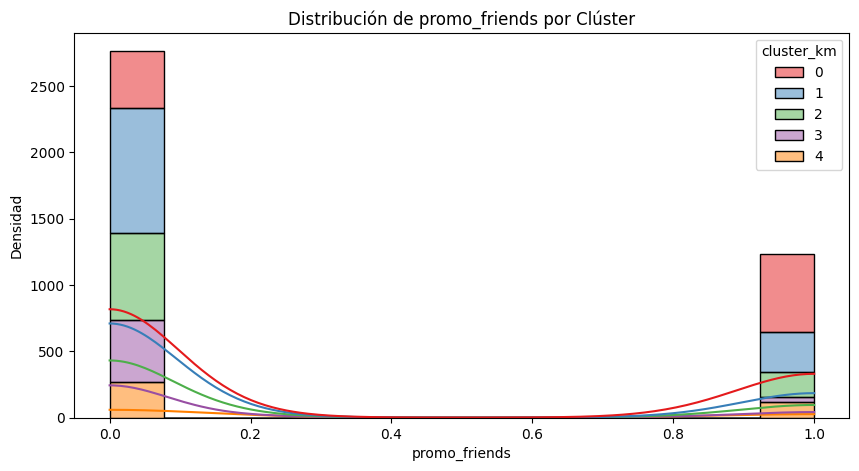

In [19]:
# Obtener todas las columnas excepto 'cluster_km'
columnas = df.columns.difference(['cluster_km'])
for columna in columnas:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=columna, hue='cluster_km', multiple="stack", palette='Set1', kde=True)
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {columna} por Clúster')
    plt.show()
    

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Me encantan las visualizaciones de arriba.</div>

**En el clurter 3:**
    en 'churn' son mas las personas que se van que las que se quedan. tambien se puede visualizar qque el promedio de personas que visitan el lugar en el mes vigente, a la segunda semana son muy pocos los que regresan, la edad y el genero no es un factor que influya ya que se distrribuye igual que las demas. pocos empleados son clientes.
    
**En el clurter 4:**
Todas la personas no tienen phone

### Calcular la tasa de cancelacion

In [20]:
### Calcular la tasa de cancelacion
cancellation_rate = df.groupby('cluster_km')['churn'].mean()
for cluster, rate in cancellation_rate.items():
    print(f"Cluster {cluster}: Tasa de cancelación = {rate:.2%}")

Cluster 0: Tasa de cancelación = 2.74%
Cluster 1: Tasa de cancelación = 51.94%
Cluster 2: Tasa de cancelación = 7.43%
Cluster 3: Tasa de cancelación = 44.18%
Cluster 4: Tasa de cancelación = 26.68%


**Conclusión:**
    El cluster 0 tiene una mayor probabilidad de que las personas cancelen

## Conclusiones generales:

- El modelo con mejores resultados es regresion logistica, ya que la metrica 'Precision' dio un mejor resultado, ya que es mas probable de que cuando diga que un cliente va a cancelar, este en lo correcto

Recomendaciones

- Los clusther con un alto promedio de personas que se registran con el codigo de invitacion, tienden a tener una menor tasa de cancelacion, este seria un buen punto a considerar ya que fijamos un marketing fijado a este punto es muy probable que la tasa de cancelacion baje.
- Los dos cluster con una tasa de cancelacion alta, tienen un promedio menor en el tiempo de visitas, lo que tendriamos que ver mas a fondo.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Mónica, excelente trabajo al resumir las conclusiones. Has hecho un análisis bien estructurado, identificando clústeres con alta tasa de cancelación y proponiendo una segmentación basada en las tasas de retención.</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Para mejorar aún más tus conclusiones, podrías agregar una recomendación detallada sobre estrategias específicas para cada clúster, lo cual haría que tus hallazgos fueran más aplicables desde un punto de vista empresarial.</div>


<div class="alert alert-block alert-success">
<b>¡Excelente trabajo, Mónica!</b> <a class="tocSkip"></a>
Has desarrollado un análisis exhaustivo y estructurado, mostrando un buen dominio de las técnicas de preprocesamiento, modelado y agrupamiento. Al implementar las sugerencias de mejora, estarás más cerca de un análisis completamente optimizado. ¡Sigue así!</div>
